In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Miniteste 2

Dados os pontos da tabela:

| x | y |
| -- | -- |
-1 | 0.03846154
-0.5 | 0.13793103
0 | 1
0.5 | 0.13793103
1 | 0.03846154

1. Utilizando o polinômio de Newton encontre (manualmente) os coeficiente do polinômio interpolador de ordem 4. **Trace o gráfico entre -1 e 1 com intervalo de 0.01 entre os pontos**  

2. Utilizando o polinômio de Lagrange encontre (manualmente) os coeficiente do polinômio interpolador de ordem 4. **Trace o gráfico entre -1 e 1 com intervalo de 0.01 entre os pontos** 

Compare os gráficos obtidos com a resposta exata dada pela função

$$f(x) = \frac{1}{1+25x^2}$$

3. Comente sobre os resultados obtidos.


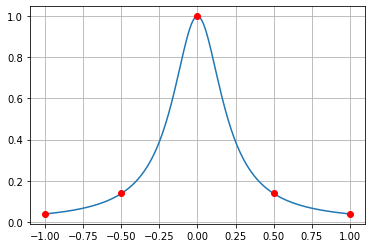

In [3]:
x_i = np.array([-1,-0.5,0,0.5,1])
y_i = 1/(1+25*x_i**2) 

x = np.arange(-1,1,0.01)
y = 1/(1+25*x**2)
plt.plot(x,y,'-',
        x_i,y_i,'ro')
plt.grid(True)

In [4]:
def lagrange(v,x,y):
    if v not in x:
        tam = x.shape[0]
        g = np.zeros((tam,tam))
        acc = 0
        for i in range(tam):
            for j in range(tam):
                if i != j:
                    g[i,j] = x[i] - x[j]
                else:
                    g[i,j] = v - x[i]
            acc += y[i]/np.prod(g[i,:])
        return acc * np.prod(np.diag(g))
    else:
        return y[v==x]

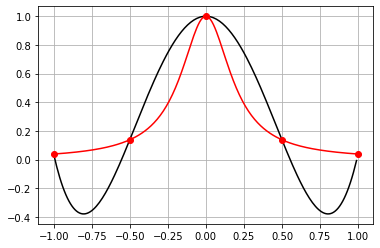

In [5]:
z = [lagrange(valor,x_i,y_i) for valor in x]
plt.plot(x,z,'k-',
        x_i,y_i,'ro',
        x,y,'r-')
plt.grid(True)

# Spline

In [6]:
from numpy.linalg import solve, inv

In [11]:
x = np.array([-1,-0.5,0,0.5,1])
y = 1/(1+25*x**2)

A = np.array([[x[0]**2,0,0,0,x[0],0,0,0,1,0,0,0],
              [x[1]**2,0,0,0,x[1],0,0,0,1,0,0,0],
              [0,x[1]**2,0,0,0,x[1],0,0,0,1,0,0],
              [0,x[2]**2,0,0,0,x[2],0,0,0,1,0,0],
              [0,0,x[2]**2,0,0,0,x[2],0,0,0,1,0],
              [0,0,x[3]**2,0,0,0,x[3],0,0,0,1,0],
              [0,0,0,x[3]**2,0,0,0,x[3],0,0,0,1],
              [0,0,0,x[4]**2,0,0,0,x[4],0,0,0,1],
              [2*x[1],-2*x[1],0,0,1,-1,0,0,0,0,0,0],
              [0,2*x[2],-2*x[2],0,0,1,-1,0,0,0,0,0],
              [0,0,2*x[3],-2*x[3],0,0,1,-1,0,0,0,0],
              [1,0,0,0,0,0,0,0,0,0,0,0]])

B = np.array([y[0],y[1],y[1],y[2],y[2],y[3],y[3],y[4],0,0,0,0])

In [12]:
C = solve(A,B)
C

array([  0.        ,   3.05039788,  -9.9469496 ,  12.99734748,
         0.19893899,   3.24933687,   3.24933687, -19.69496021,
         0.23740053,   1.        ,   1.        ,   6.73607427])

In [13]:
def spline(valor,c,xo):
    if valor <= xo[1]:
        return c[0]*valor**2+c[4]*valor+c[8]
    elif valor <= xo[2]:
        return c[1]*valor**2+c[5]*valor+c[9]
    elif valor <= xo[3]:
        return c[2]*valor**2+c[6]*valor+c[10]
    elif valor <= xo[4]:
        return c[3]*valor**2+c[7]*valor+c[11]

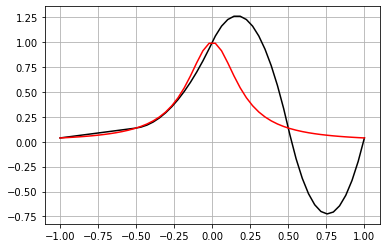

In [14]:
xi = np.linspace(-1,1,50)
yi = [spline(i,C,x) for i in xi]

yr = 1/(1+25*xi**2)

plt.plot(xi,yi,'k-',
        xi,yr,'r-')
plt.grid(True)

# Implementação numpy

In [34]:
from scipy import interpolate

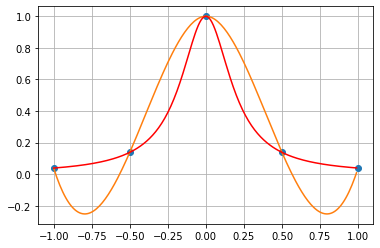

In [39]:
f = interpolate.interp1d(x_i, y_i,3)
xnew = np.arange(-1,1, 0.01)
ynew = f(xnew)   
yreal= 1/(1+25*xnew**2)
plt.plot(x, y, 'o', xnew, ynew, '-', xnew,yreal,'r-')
plt.grid(True)

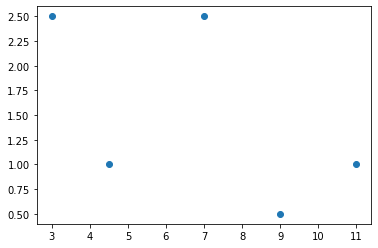

In [40]:
xl = np.array([3, 4.5, 7, 9,11])
yl = np.array([2.5,1,2.5,0.5,1])

plt.plot(xl,yl,'o')
plt.show()

In [41]:
def matriz_spline_5(x,y):
    A = np.array([[x[0]**2,0,0,0,x[0],0,0,0,1,0,0,0],
                  [x[1]**2,0,0,0,x[1],0,0,0,1,0,0,0],
                  [0,x[1]**2,0,0,0,x[1],0,0,0,1,0,0],
                  [0,x[2]**2,0,0,0,x[2],0,0,0,1,0,0],
                  [0,0,x[2]**2,0,0,0,x[2],0,0,0,1,0],
                  [0,0,x[3]**2,0,0,0,x[3],0,0,0,1,0],
                  [0,0,0,x[3]**2,0,0,0,x[3],0,0,0,1],
                  [0,0,0,x[4]**2,0,0,0,x[4],0,0,0,1],
                  [2*x[1],-2*x[1],0,0,1,-1,0,0,0,0,0,0],
                  [0,2*x[2],-2*x[2],0,0,1,-1,0,0,0,0,0],
                  [0,0,2*x[3],-2*x[3],0,0,1,-1,0,0,0,0],
                  [1,0,0,0,0,0,0,0,0,0,0,0]])

    B = np.array([y[0],y[1],y[1],y[2],y[2],y[3],y[3],y[4],0,0,0,0])
    return solve(A,B)

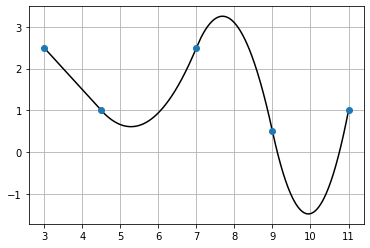

In [25]:
C = matriz_spline_5(xl,yl)
xi = np.arange(3,11,0.01)
yi = [spline(i,C,xl) for i in xi]


plt.plot(xi,yi,'k-',
        xl,yl,'o')
plt.grid(True)